# Final Kaggle Project : Porto Seguro 

For more information , Click [here](https://www.kaggle.com/c/porto-seguro-safe-driver-prediction).
### 1.1 Importing numpy and pandas

In [3]:
# The Basic.
import numpy as np 
import pandas as pd 
from collections import Counter


# Models to be used.
from xgboost import XGBClassifier
#import lightgbm as lgbm

# To calculate the feature importance.
from sklearn.ensemble import RandomForestClassifier 
from sklearn.ensemble import RandomForestRegressor

# Data preprocessing.
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

# Model Selection
from sklearn.model_selection import StratifiedKFold

# Helper Tools.
import missingno as missing
from matplotlib import pyplot as plt

# Building a sparse matrix.
from scipy import sparse as sp


OSError: dlopen(/Users/gauthamsrivatsav/anaconda2/lib/python2.7/site-packages/libxgboostwrapper.so, 6): Symbol not found: __ZNKSt5ctypeIcE13_M_widen_initEv
  Referenced from: /Users/gauthamsrivatsav/anaconda2/lib/python2.7/site-packages/libxgboostwrapper.so
  Expected in: /usr/lib/libstdc++.6.0.9.dylib
 in /Users/gauthamsrivatsav/anaconda2/lib/python2.7/site-packages/libxgboostwrapper.so

### 1.2 Importing Porto Seguro data to pandas library.

**Train Data Set :** _D:\Uni\Sem 1\AML\Final-Kaggle\datasets\train.csv_ <br />
**Test Data Set :** _D:\Uni\Sem 1\AML\Final-Kaggle\datasets\test.csv_

In [194]:
train_csv = pd.read_csv("/mnt/d/Uni/Sem 1/AML/Final-Kaggle/datasets/train.csv")
test_csv = pd.read_csv("/mnt/d/Uni/Sem 1/AML/Final-Kaggle/datasets/test.csv")

In [187]:
np.array(train_csv.index)

[      7       9      13 ..., 1488017 1488021 1488027]


In [37]:
train_csv.describe()
list(train_csv)
print(train_csv.columns)

Index(['target', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      

In [10]:
print(train_csv.head(5))
#print(test_csv.head(5))

    target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  ps_ind_05_cat  \
id                                                                              
7        0          2              2          5              1              0   
9        0          1              1          7              0              0   
13       0          5              4          9              1              0   
16       0          0              1          2              0              0   
17       0          0              2          0              1              0   

    ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ps_ind_09_bin  \
id                                                               
7               0              1              0              0   
9               0              0              1              0   
13              0              0              1              0   
16              1              0              0              0   
17              1              0    

In [186]:
print(test_csv.columns)

Index(['id', 'ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat',
       'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin',
       'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin',
       'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin',
       'ps_ind_17_bin', 'ps_ind_18_bin', 'ps_reg_01', 'ps_reg_02', 'ps_reg_03',
       'ps_car_01_cat', 'ps_car_02_cat', 'ps_car_03_cat', 'ps_car_04_cat',
       'ps_car_05_cat', 'ps_car_06_cat', 'ps_car_07_cat', 'ps_car_08_cat',
       'ps_car_09_cat', 'ps_car_10_cat', 'ps_car_11_cat', 'ps_car_11',
       'ps_car_12', 'ps_car_13', 'ps_car_14', 'ps_car_15', 'ps_calc_01',
       'ps_calc_02', 'ps_calc_03', 'ps_calc_04', 'ps_calc_05', 'ps_calc_06',
       'ps_calc_07', 'ps_calc_08', 'ps_calc_09', 'ps_calc_10', 'ps_calc_11',
       'ps_calc_12', 'ps_calc_13', 'ps_calc_14', 'ps_calc_15_bin',
       'ps_calc_16_bin', 'ps_calc_17_bin', 'ps_calc_18_bin', 'ps_calc_19_bin',
       'ps_calc_20_bin'],
      dtyp

### 1.3 Data Dimensions [Train & Test] &amp; Quality Checks

If any treatment is being done it has to be applied to both test set and train set.

In [12]:
dim_train = train_csv.shape
dim_test = test_csv.shape
print("Train Set")
print("=========")
print("Rows = {0},Columns = {1}".format(dim_train[0],dim_train[1]))
print("Test Set")
print("=========")
print("Rows = {0},Columns = {1}".format(dim_test[0],dim_test[1]))

Train Set
Rows = 595212,Columns = 58
Test Set
Rows = 892816,Columns = 58


### 1.4 Check for null values in data set.

No null value or empty cells columns have been observed.

**In the document it has been mentioned that all the values that are not available are replaced with -1.**

The below table also outputs the number of missing values in the data.

48 columns with Integer type 
10 colums with float type.
1 column id.

Not considering **id column** while designing model.

In [210]:

print("Missing Values : {}".format(train_csv.replace(-1,np.NaN).isnull().any().any()) )
print(train_csv.isnull().any().any())

print(train_csv[train_csv == -1].count())


Missing Values : True
False
id                     0
target                 0
ps_ind_01              0
ps_ind_02_cat        216
ps_ind_03              0
ps_ind_04_cat         83
ps_ind_05_cat       5809
ps_ind_06_bin          0
ps_ind_07_bin          0
ps_ind_08_bin          0
ps_ind_09_bin          0
ps_ind_10_bin          0
ps_ind_11_bin          0
ps_ind_12_bin          0
ps_ind_13_bin          0
ps_ind_14              0
ps_ind_15              0
ps_ind_16_bin          0
ps_ind_17_bin          0
ps_ind_18_bin          0
ps_reg_01              0
ps_reg_02              0
ps_reg_03         107772
ps_car_01_cat        107
ps_car_02_cat          5
ps_car_03_cat     411231
ps_car_04_cat          0
ps_car_05_cat     266551
ps_car_06_cat          0
ps_car_07_cat      11489
ps_car_08_cat          0
ps_car_09_cat        569
ps_car_10_cat          0
ps_car_11_cat          0
ps_car_11              5
ps_car_12              1
ps_car_13              0
ps_car_14          42620
ps_car_15             

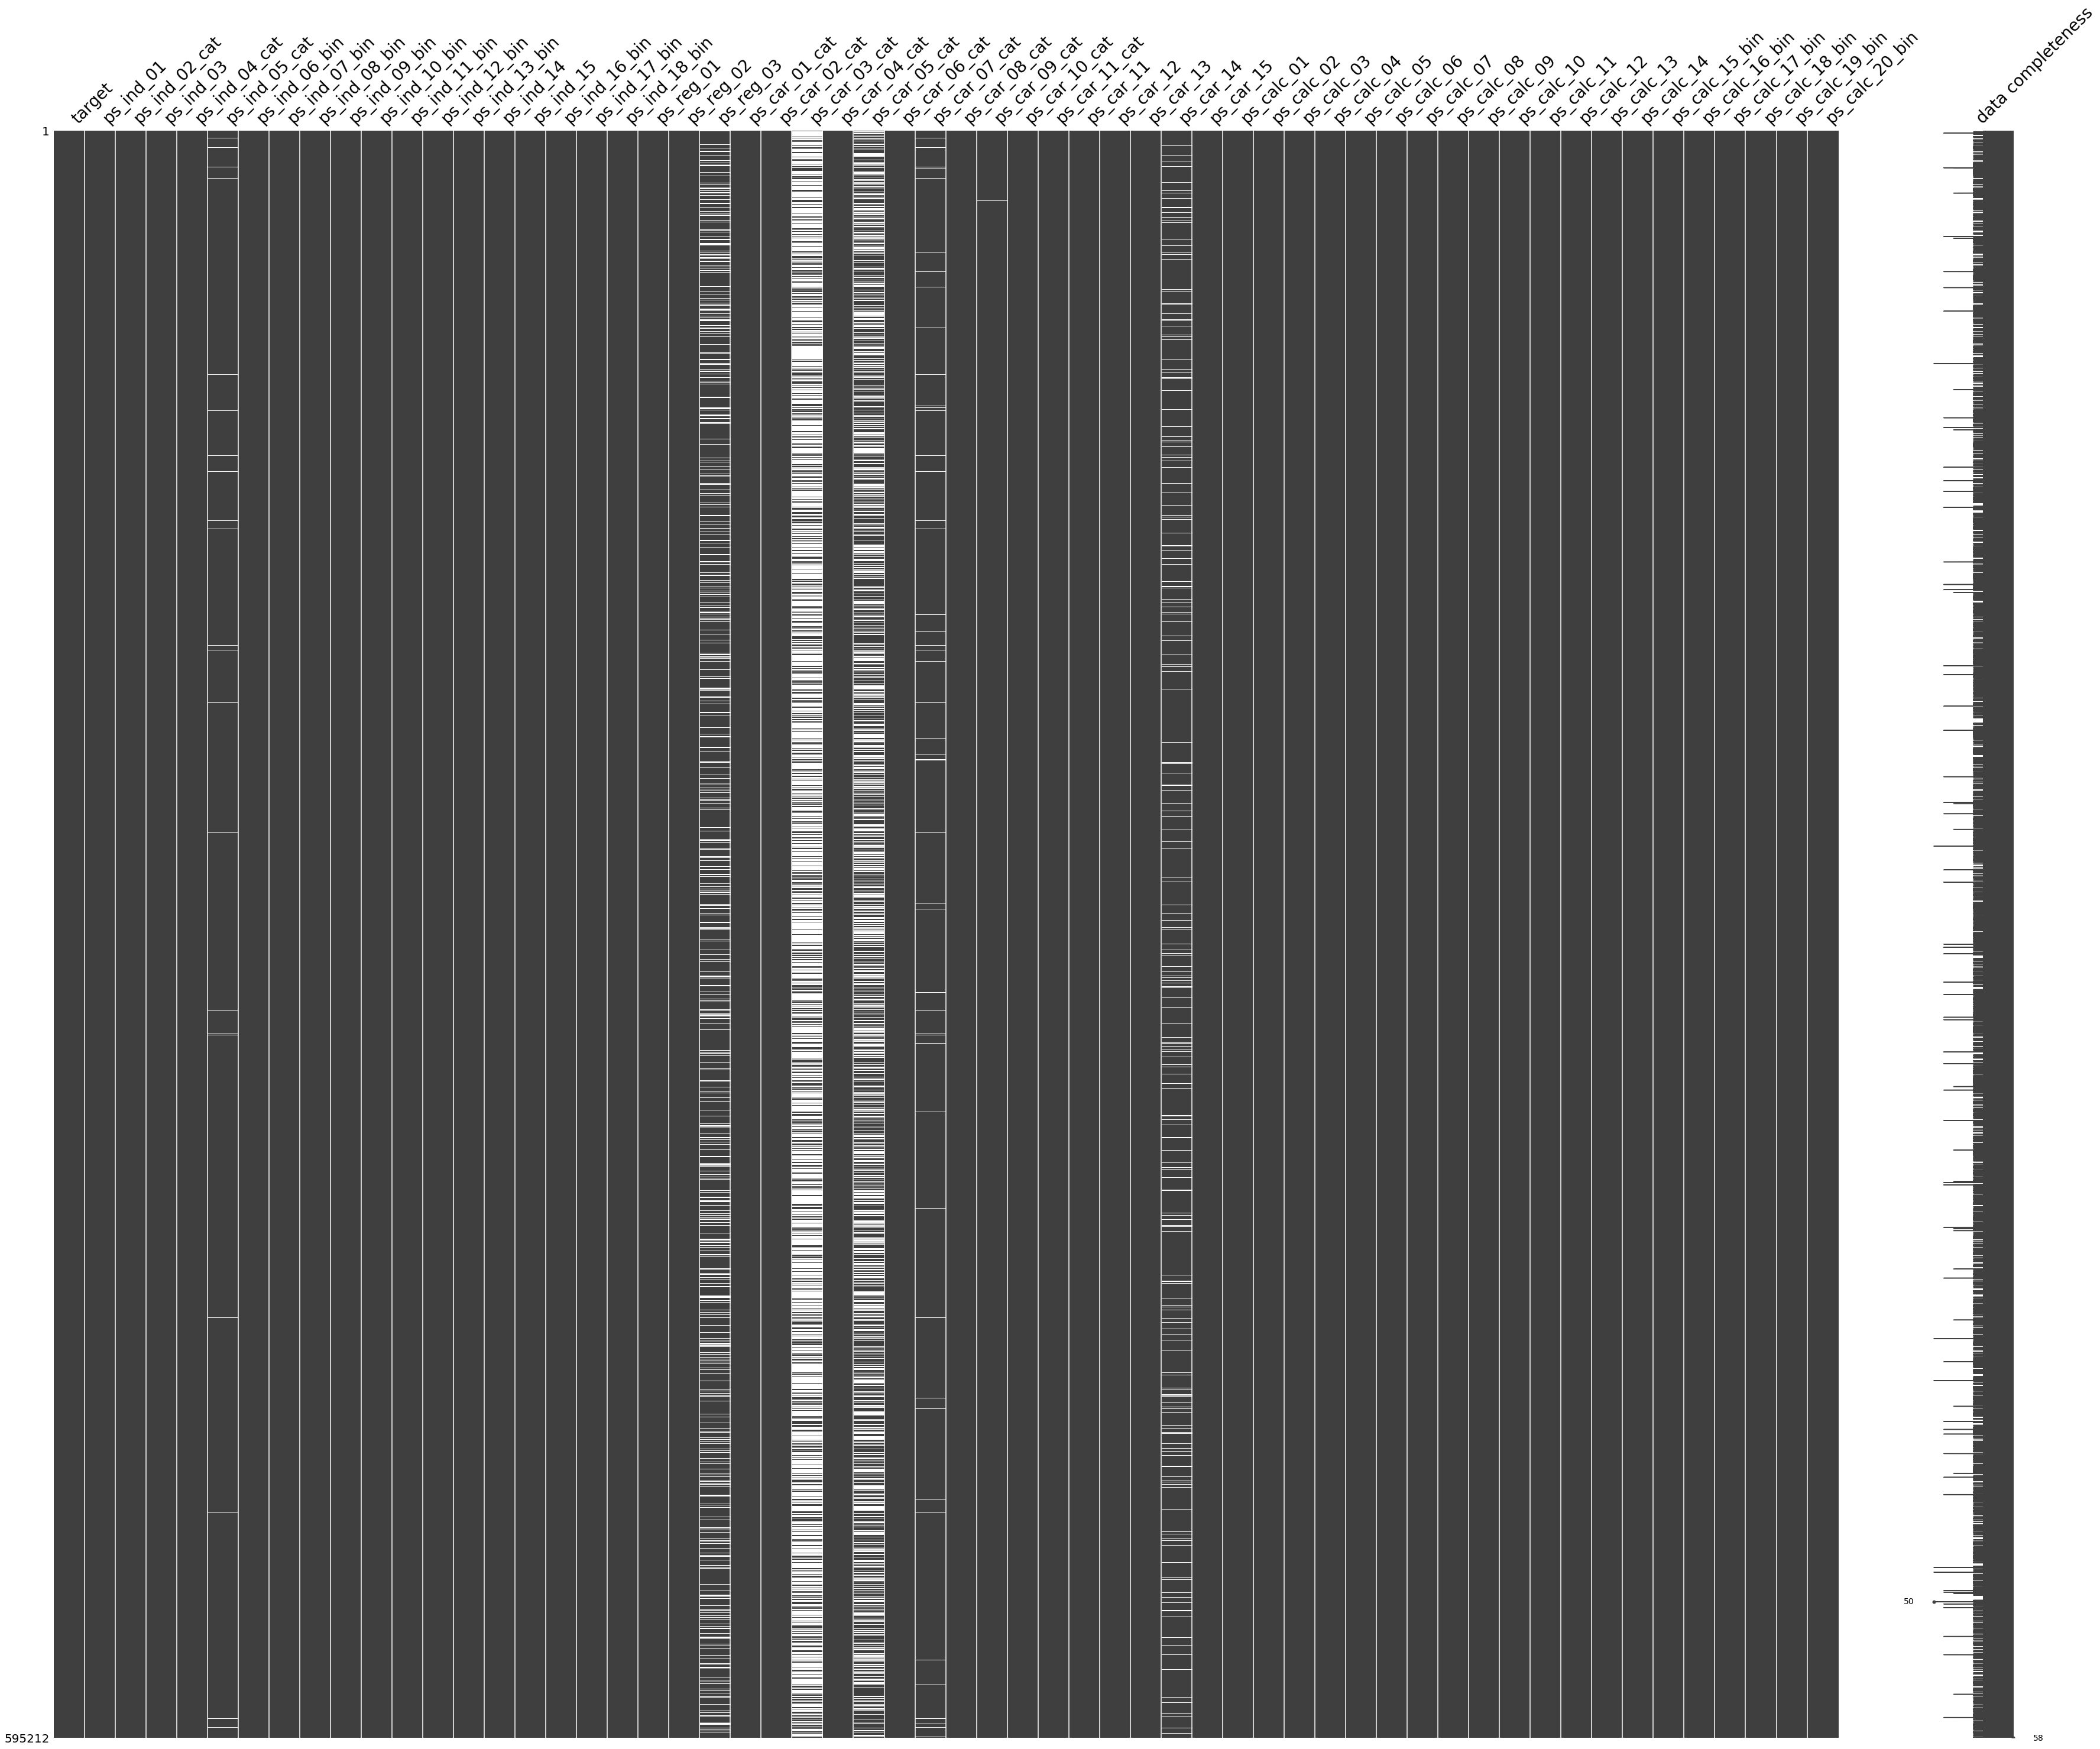

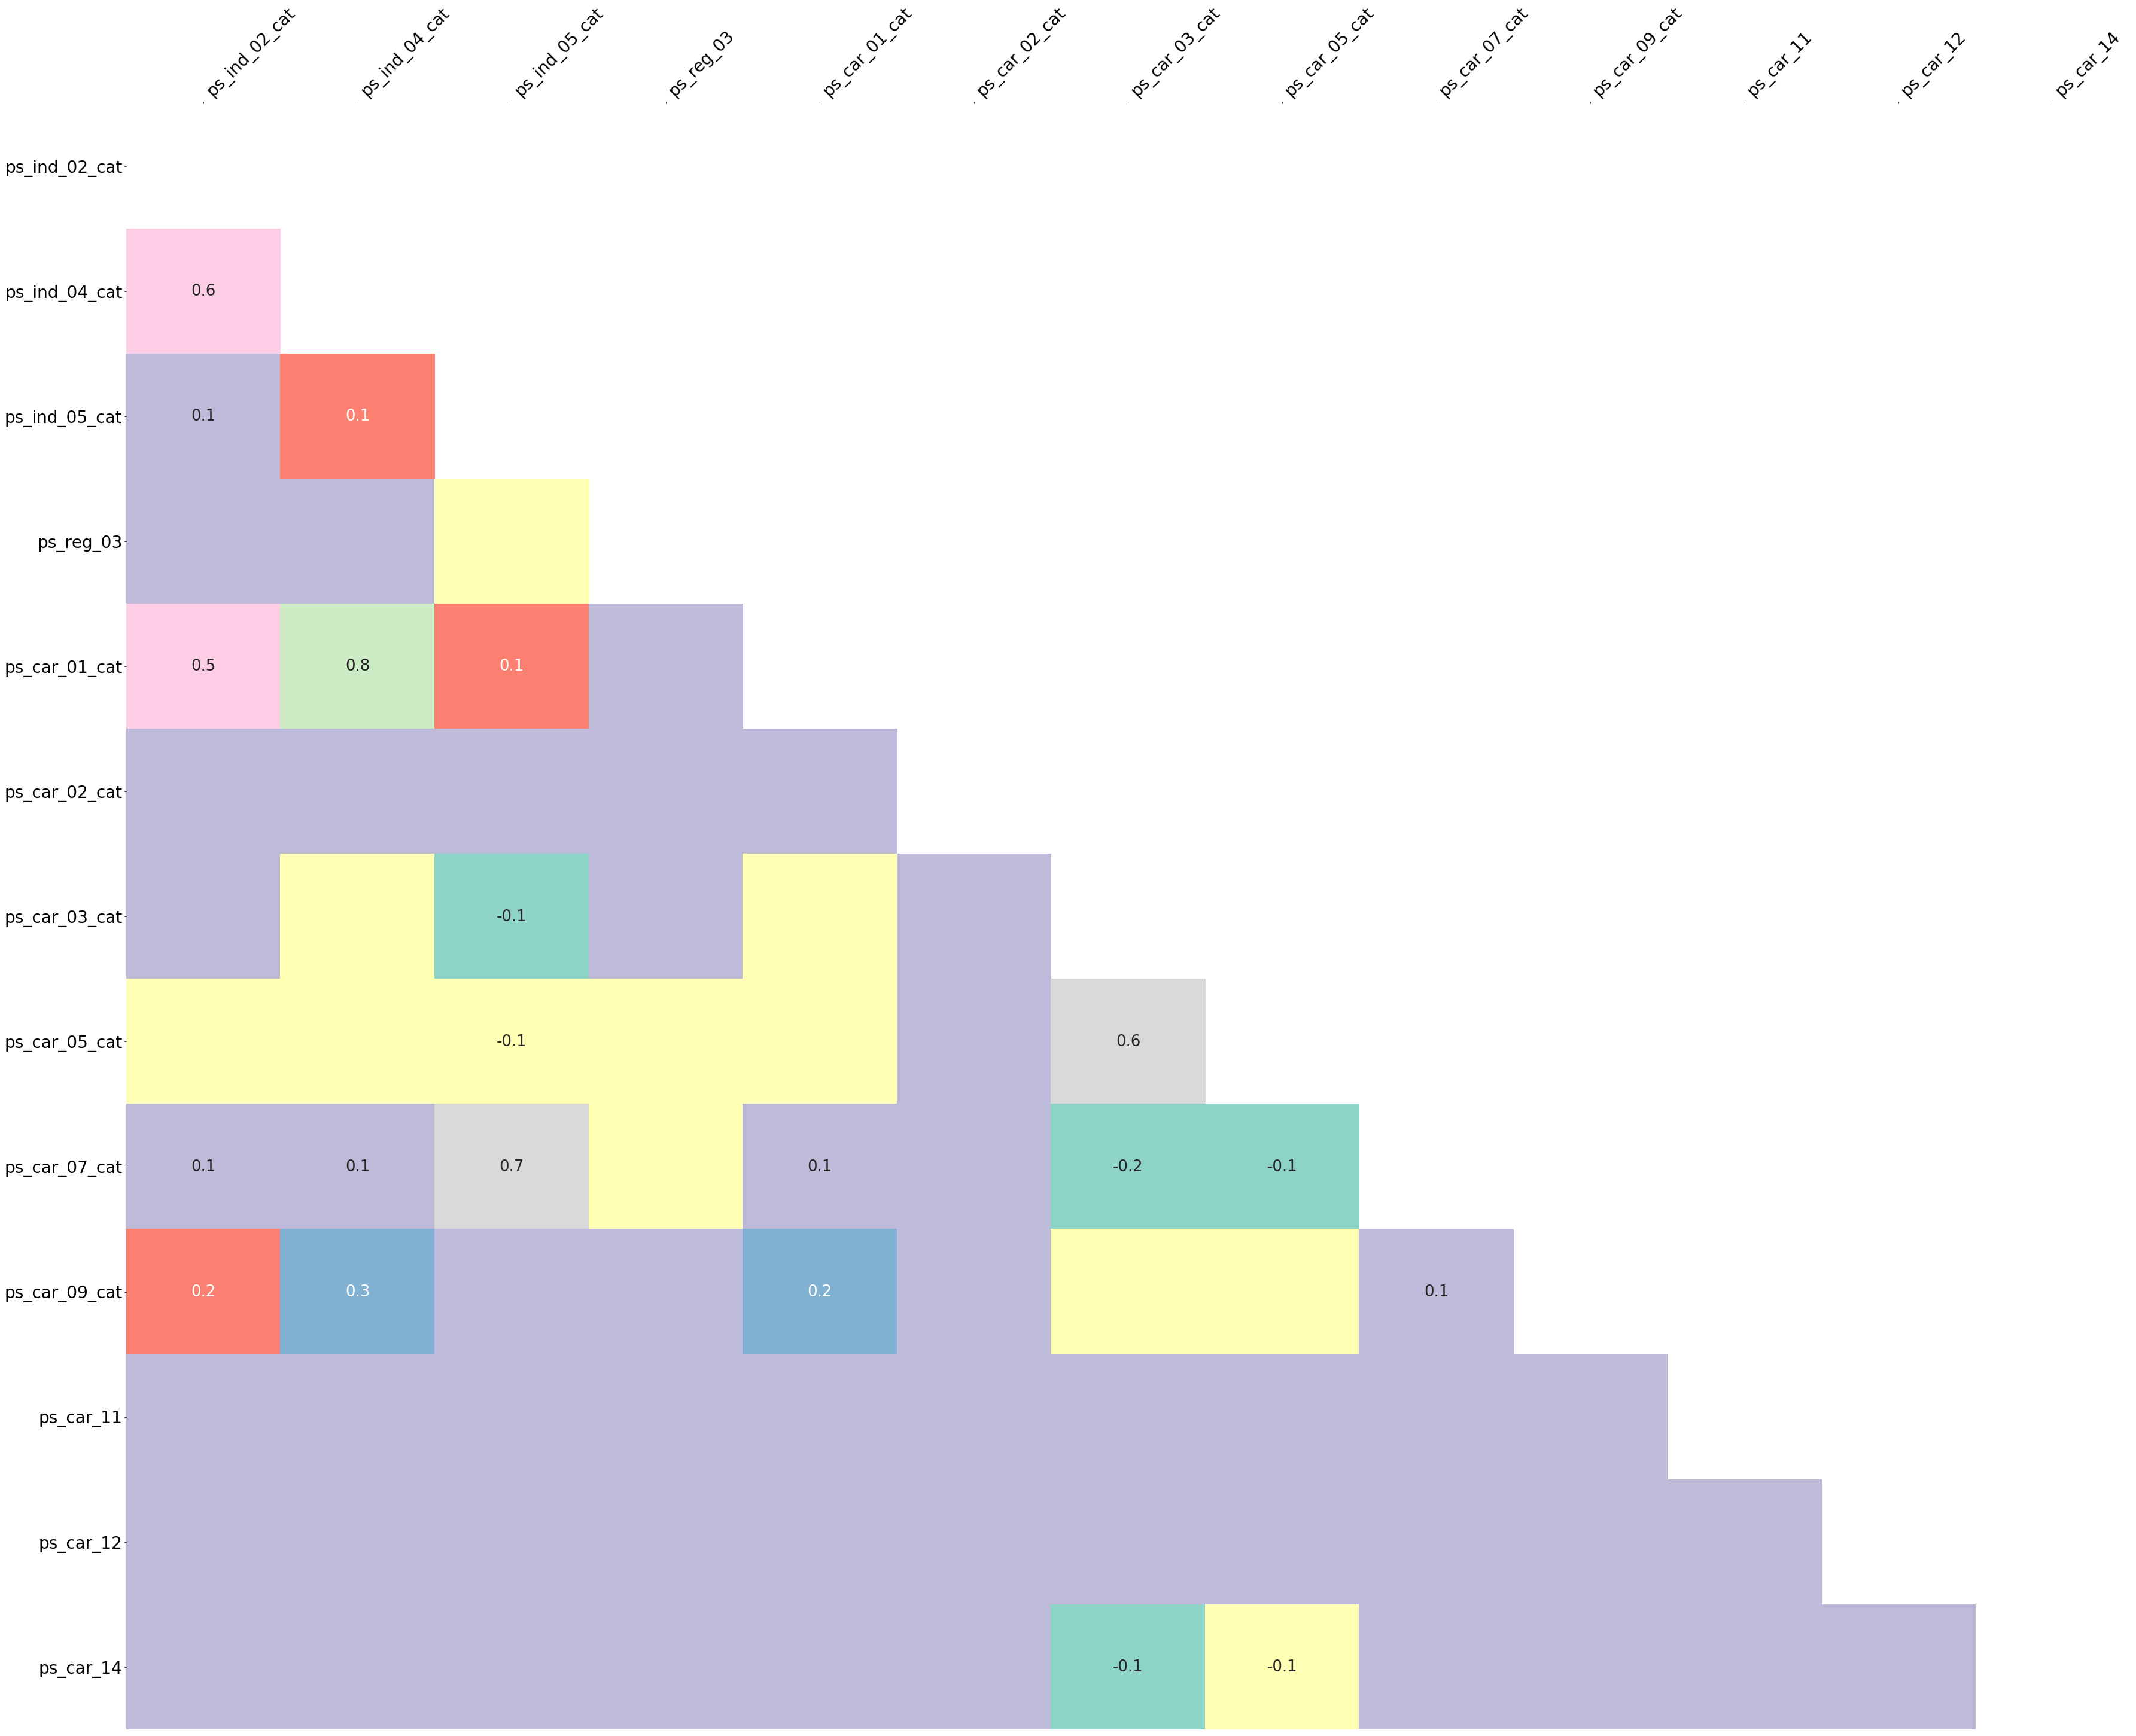

Counter({dtype('int64'): 48, dtype('float64'): 10})


In [14]:
%matplotlib inline
missing.matrix(df = train_csv.replace(-1,np.NaN),figsize=(60,50),fontsize = 28,labels = True)
missing.heatmap(train_csv.replace(-1,np.NaN),figsize=(60,50),fontsize = 28,labels = True,cmap = "Set3")
print(Counter(train_csv.dtypes.values))

In [18]:
train_csv.iloc[:,1:].corr()

,ps_ind_01,ps_ind_02_cat,ps_ind_03,ps_ind_04_cat,ps_ind_05_cat,ps_ind_06_bin,ps_ind_07_bin,ps_ind_08_bin,ps_ind_09_bin,ps_ind_10_bin,...,ps_calc_11,ps_calc_12,ps_calc_13,ps_calc_14,ps_calc_15_bin,ps_calc_16_bin,ps_calc_17_bin,ps_calc_18_bin,ps_calc_19_bin,ps_calc_20_bin
ps_ind_01,1.000000,-0.001793,0.223408,0.066645,0.014823,-0.277458,0.005700,0.188583,0.162800,0.001847,...,-0.001263,0.001521,0.000199,-0.000891,-0.000397,-0.000012,-0.000868,-0.001504,-0.000162,-0.001464
ps_ind_02_cat,-0.001793,1.000000,-0.061189,0.147110,-0.014860,-0.125653,0.016398,0.030945,0.110076,-0.000744,...,0.000038,-0.000884,-0.000893,-0.000519,-0.000109,0.000920,0.000547,0.000824,0.000367,-0.002070
ps_ind_03,0.223408,-0.061189,1.000000,-0.095856,0.053250,-0.045158,-0.060368,0.014037,0.111306,0.006865,...,-0.002716,-0.002352,0.000133,0.000205,0.000134,-0.000744,0.000158,-0.000218,-0.000882,-0.003709
ps_ind_04_cat,0.066645,0.147110,-0.095856,1.000000,0.013053,-0.297737,0.304949,0.044978,-0.011442,0.000789,...,-0.002001,-0.000814,0.000283,0.001565,0.002735,0.002295,0.000773,0.000916,-0.001966,0.001244
ps_ind_05_cat,0.014823,-0.014860,0.053250,0.013053,1.000000,0.009619,-0.010382,0.004881,-0.005069,0.001742,...,-0.001525,0.000975,0.001549,0.002171,0.001548,-0.000368,0.000153,0.000032,0.000276,0.000279
ps_ind_06_bin,-0.277458,-0.125653,-0.045158,-0.297737,0.009619,1.000000,-0.474009,-0.356838,-0.384345,-0.008978,...,0.000822,0.001347,-0.001301,0.000304,0.002088,-0.000381,-0.000001,-0.000759,0.002791,0.000203
ps_ind_07_bin,0.005700,0.016398,-0.060368,0.304949,-0.010382,-0.474009,1.000000,-0.260438,-0.280513,0.010740,...,-0.000448,-0.001044,0.000541,0.001666,0.000575,0.001220,-0.000517,0.000181,-0.001361,-0.000961
ps_ind_08_bin,0.188583,0.030945,0.014037,0.044978,0.004881,-0.356838,-0.260438,1.000000,-0.211173,0.006489,...,-0.000632,-0.001241,-0.000432,-0.001959,-0.002782,-0.002048,-0.000579,-0.000068,-0.000919,0.000995
ps_ind_09_bin,0.162800,0.110076,0.111306,-0.011442,-0.005069,-0.384345,-0.280513,-0.211173,1.000000,-0.006973,...,0.000072,0.000664,0.001439,-0.000389,-0.000621,0.001059,0.001135,0.000815,-0.001103,-0.000123
ps_ind_10_bin,0.001847,-0.000744,0.006865,0.000789,0.001742,-0.008978,0.010740,0.006489,-0.006973,1.000000,...,-0.002349,0.001367,0.001969,0.000232,-0.003233,0.001012,0.000345,0.000240,0.001555,-0.003390


### 1.6 Feature Selection - Removing Features with low Variance.

In [28]:
from sklearn.feature_selection import VarianceThreshold


### 1.5 Feature Importance using Random Forests.


In [41]:
rf = RandomForestClassifier(n_estimators=150, max_depth=8, min_samples_leaf=4, max_features=0.2, n_jobs=10, random_state=0)
rf.fit(train_csv.drop(['target'],axis=1), train_csv.target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=8, max_features=0.2, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=150, n_jobs=10,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [23]:
len(train_csv.drop(['target'],axis=1).columns)

57

In [24]:
print(test_csv.head())
output_rf = pd.DataFrame(rf.predict(test_csv.drop(['id'],axis = 1)))
print(output_rf.head())
print(output_rf.head())
#output_rf.shape(rf.feature_importances_)
#output_rf.to_csv("submission.csv",encoding="utf-8",index_label=["id","target"])


   id  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  ps_ind_05_cat  \
0   0          0              1          8              1              0   
1   1          4              2          5              1              0   
2   2          5              1          3              0              0   
3   3          0              1          6              0              0   
4   4          5              1          7              0              0   

   ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ps_ind_09_bin       ...        \
0              0              1              0              0       ...         
1              0              0              0              1       ...         
2              0              0              0              1       ...         
3              1              0              0              0       ...         
4              0              0              0              1       ...         

   ps_calc_11  ps_calc_12  ps_calc_13  ps_calc_14  ps_ca

[ 0.01686435  0.01105381  0.03621917  0.01947057  0.07861381  0.0198714
  0.02209324  0.00419871  0.00360775  0.00037432  0.00065859  0.00134687
  0.00066313  0.00239625  0.02559893  0.01392035  0.05697213  0.00215791
  0.01647599  0.03813133  0.07169757  0.0255427   0.00940438  0.02143813
  0.02801438  0.00616148  0.01363555  0.03161602  0.00339424  0.00931835
  0.00198957  0.01690005  0.00613131  0.02657521  0.1297259   0.02773069
  0.018553    0.01200976  0.01216037  0.01157623  0.00812875  0.01059423
  0.00859807  0.01155533  0.01014094  0.00976022  0.01906801  0.01594884
  0.01007779  0.01170992  0.01718398  0.00187013  0.00225745  0.00246969
  0.00245583  0.00263025  0.00128709]
57
57


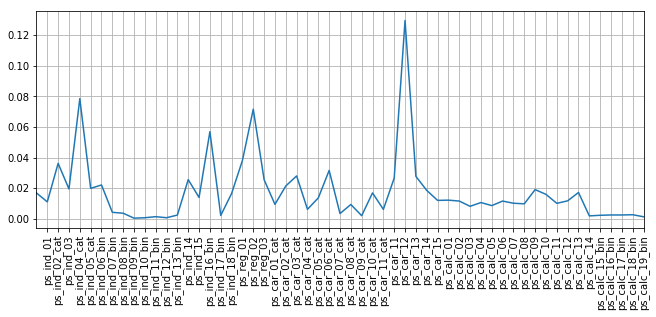

In [118]:
import matplotlib.ticker as ticker
import matplotlib.figure as figure
print(rf.feature_importances_)
print(len(rf.feature_importances_))
print(len(train_csv.iloc[:,1:].columns))
labels_FI_RC = train_csv.columns[1:]

#print(arange(12))
plt.plot(rf.feature_importances_)
plt.xticks(range(1,57,1),[i for i in labels_FI_RC],rotation = "vertical",fontsize= 10 )
plt.grid()
plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.2 # inch margin
s = maxsize/plt.gcf().dpi*57+2*m
margin = m/plt.gcf().get_size_inches()[0]

plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])

#plt.tick_params(axis='both', which='major', pad=10)
#figure(num=None, figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
#axis = plt.axes()
#axis.xaxis.set_minor_locator(ticker.MultipleLocator(100))
#axis.xaxis.set_major_locator(ticker.MultipleLocator(1))
# important_features = [i for i in rf.feature_importances_ if i > np.mean(feature_importances_)]

In [212]:
plt.bar(train_csv.columns[1:],gbc.feature_importances_,align ="center")
plt.xticks(rotation = "vertical",fontsize= 10)
plt.grid()
plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.2 # inch margin
s = maxsize/plt.gcf().dpi*57+2*m
margin = m/plt.gcf().get_size_inches()[0]
plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])
plt.title("Feature Importance using Random Forest Classifier")
plt.ylabel("Importance")

NameError: name 'gbc' is not defined

### 1.6 Feature Selection using Gradient Descent Boosting Classifier

The results are pretty much similar to the above.

In [104]:
from sklearn.ensemble import GradientBoostingClassifier 

In [123]:
gbc = GradientBoostingClassifier(n_estimators=150, learning_rate = 0.01 ,max_depth=8, min_samples_leaf=4, max_features=0.2, random_state=0)
gbc.fit(train_csv.drop(['target'],axis=1), train_csv.target)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.01, loss='deviance', max_depth=8,
              max_features=0.2, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=4, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=150,
              presort='auto', random_state=0, subsample=1.0, verbose=0,
              warm_start=False)

In [125]:
output_gbc = pd.DataFrame(gbc.predict(test_csv.drop(['id'],axis = 1)))

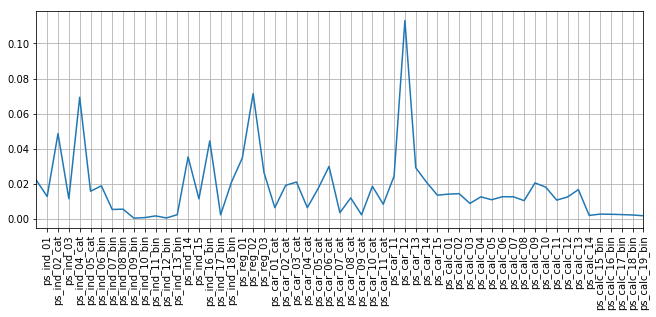

In [126]:
plt.plot(gbc.feature_importances_)
plt.xticks(range(1,57,1),[i for i in labels_FI_RC],rotation = "vertical",fontsize= 10 )
plt.grid()
plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.2 # inch margin
s = maxsize/plt.gcf().dpi*57+2*m
margin = m/plt.gcf().get_size_inches()[0]

plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])

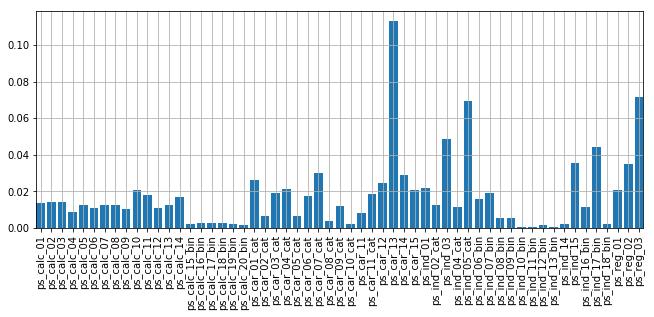

In [134]:
plt.bar(labels_FI_RC,gbc.feature_importances_,align ="center")
plt.xticks(rotation = "vertical",fontsize= 10)
plt.grid()
plt.gca().margins(x=0)
plt.gcf().canvas.draw()
tl = plt.gca().get_xticklabels()
maxsize = max([t.get_window_extent().width for t in tl])
m = 0.2 # inch margin
s = maxsize/plt.gcf().dpi*57+2*m
margin = m/plt.gcf().get_size_inches()[0]
plt.gcf().subplots_adjust(left=margin, right=1.-margin)
plt.gcf().set_size_inches(s, plt.gcf().get_size_inches()[1])

### 1.8 Predicting Using Random Forest Regressor.

- Got a pretty low result after removing the columns thart are having the missing columns.
- Even after the continious tuning of variables didnt observed a major change in Gini Index respective to the competition.
- Gave up on this model.

#### After dropping the columns which are having missing values.

'ps_ind_02_cat','ps_ind_04_cat','ps_ind_05_cat','ps_reg_03','ps_car_01_cat','ps_car_02_cat','ps_car_03_cat','ps_car_05_cat','ps_car_07_cat','ps_car_09_cat','ps_car_14'

In [ ]:
train_csv_drop = train_csv.drop(['ps_ind_02_cat','ps_ind_04_cat','ps_ind_05_cat','ps_reg_03','ps_car_01_cat','ps_car_02_cat','ps_car_03_cat','ps_car_05_cat','ps_car_07_cat','ps_car_09_cat','ps_car_12','ps_car_11','ps_car_14'],axis=1)
rfr_drop = RandomForestRegressor(n_estimators=150, max_depth=8, min_samples_leaf=4, max_features=0.2, n_jobs=10, random_state=0)
rfr_drop.fit(train_csv_drop.drop(['target'],axis=1), train_csv_drop.target)

In [ ]:
test_rfr_drop = test_csv.drop(['id','ps_ind_02_cat','ps_ind_04_cat','ps_ind_05_cat','ps_reg_03','ps_car_01_cat','ps_car_02_cat','ps_car_03_cat','ps_car_05_cat','ps_car_07_cat','ps_car_09_cat','ps_car_12','ps_car_11','ps_car_14'],axis=1)
print(test_rfr_drop.head())
output_rfr_drop = pd.DataFrame(rfr_drop.predict(test_rfr_drop))
output_rfr_drop = pd.concat([test_csv.id,output_rf_drop],axis=1)
output_rfr_drop.columns = ['id', 'target']
print(output_rfr_drop.head())
output_rfr_drop.to_csv("submission_drop.csv",index =False)

In [ ]:
test_csv_drop = test_csv.drop(['id'],axis = 1)
output_rfr = pd.DataFrame(rfr.predict(test_csv_drop))

In [1]:
output_rfr = pd.concat([test_csv.id,output_rfr],axis=1)
print(output_rfr.head())
output_rfr.columns = ['id', 'target']
print(output_rfr.head())
output_rfr.to_csv("submission1.csv",index =False)

NameError: name 'pd' is not defined

### 1.9  Predicting Using XGBClassifier


### 1.9.1 Calculating Gini Index 

- For calculating the Gini Index i used the code from kaggle. 
- The Copyright for the below code completely belongs to the participants who shared the info on Porto Seguro [Kernels]

In [200]:
def Gini(y_true, y_pred):
    # check and get number of samples
    assert y_true.shape == y_pred.shape
    n_samples = y_true.shape[0]

    # sort rows on prediction column
    # (from largest to smallest)
    arr = np.array([y_true, y_pred]).transpose()
    true_order = arr[arr[:, 0].argsort()][::-1, 0]
    pred_order = arr[arr[:, 1].argsort()][::-1, 0]

    # Lorenz curves to calculate the Gini Index.
    L_true = np.cumsum(true_order) * 1. / np.sum(true_order)
    L_pred = np.cumsum(pred_order) * 1. / np.sum(pred_order)
    L_ones = np.linspace(1 / n_samples, 1, n_samples)

    # Area between the curves.
    G_true = np.sum(L_ones - L_true)
    G_pred = np.sum(L_ones - L_pred)

    # Normalizing the gini coefficient.
    return G_pred * 1. / G_true

In [60]:
def evalerror(preds, dtrain):
    labels = dtrain.get_label()
    return 'gini', Gini(labels, preds), True

In [58]:
def eval_gini(y_true, y_prob):
    y_true = np.asarray(y_true)
    y_true = y_true[np.argsort(y_prob)]
    ntrue = 0
    gini = 0
    delta = 0
    n = len(y_true)
    for i in range(n-1, -1, -1):
        y_i = y_true[i]
        ntrue += y_i
        gini += y_i * delta
        delta += 1 - y_i
    gini = 1 - 2 * gini / (ntrue * (n - ntrue))
    return gini


# Funcitons from olivier's kernel
# https://www.kaggle.com/ogrellier/xgb-classifier-upsampling-lb-0-283

def gini_xgb(preds, dtrain):
    labels = dtrain.get_label()
    gini_score = -eval_gini(labels, preds)
    return [('gini', gini_score)]


def add_noise(series, noise_level):
    return series * (1 + noise_level * np.random.randn(len(series)))


def target_encode(trn_series=None,    # Revised to encode validation series
                  val_series=None,
                  tst_series=None,
                  target=None,
                  min_samples_leaf=1,
                  smoothing=1,
                  noise_level=0):
    """
    Smoothing is computed like in the following paper by Daniele Micci-Barreca
    https://kaggle2.blob.core.windows.net/forum-message-attachments/225952/7441/high%20cardinality%20categoricals.pdf
    trn_series : training categorical feature as a pd.Series
    tst_series : test categorical feature as a pd.Series
    target : target data as a pd.Series
    min_samples_leaf (int) : minimum samples to take category average into account
    smoothing (int) : smoothing effect to balance categorical average vs prior
    """
    assert len(trn_series) == len(target)
    assert trn_series.name == tst_series.name
    temp = pd.concat([trn_series, target], axis=1)
    # Compute target mean
    averages = temp.groupby(by=trn_series.name)[target.name].agg(["mean", "count"])
    # Compute smoothing
    smoothing = 1 / (1 + np.exp(-(averages["count"] - min_samples_leaf) / smoothing))
    # Apply average function to all target data
    prior = target.mean()
    # The bigger the count the less full_avg is taken into account
    averages[target.name] = prior * (1 - smoothing) + averages["mean"] * smoothing
    averages.drop(["mean", "count"], axis=1, inplace=True)
    # Apply averages to trn and tst series
    ft_trn_series = pd.merge(
        trn_series.to_frame(trn_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=trn_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_trn_series.index = trn_series.index
    ft_val_series = pd.merge(
        val_series.to_frame(val_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'average'}),
        on=val_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_val_series.index = val_series.index
    ft_tst_series = pd.merge(
        tst_series.to_frame(tst_series.name),
        averages.reset_index().rename(columns={'index': target.name, target.name: 'avebrage'}),
        on=tst_series.name,
        how='left')['average'].rename(trn_series.name + '_mean').fillna(prior)
    # pd.merge does not keep the index so restore it
    ft_tst_series.index = tst_series.index
    return add_noise(ft_trn_series, noise_level), add_noise(ft_val_series, no
                                                            ++++++++ise_level), add_noise(ft_tst_series, noise_level)

In [59]:
# specify parameters via map
model = XGBClassifier(    
                        n_estimators=300,
                        max_depth=4,
                        objective="binary:logistic",
                        learning_rate=0.50, 
                        subsample=.8,
                        min_child_weight=6,
                        colsample_bytree=.8,
                        scale_pos_weight=1.6,
                        gamma=10,
                        reg_alpha=8,
                        reg_lambda=1.3,
                     )

num_round = 2
model.fit(train_csv.drop(['target'],axis=1), train_csv.target)



XGBClassifier(base_score=0.5, colsample_bylevel=1, colsample_bytree=0.8,
       gamma=10, learning_rate=0.5, max_delta_step=0, max_depth=4,
       min_child_weight=6, missing=None, n_estimators=300, nthread=-1,
       objective='binary:logistic', reg_alpha=8, reg_lambda=1.3,
       scale_pos_weight=1.6, seed=0, silent=True, subsample=0.8)

In [33]:
model.predict(test_csv.drop(['id'],axis = 1))

array([0, 0, 0, ..., 0, 0, 0])

### 1.9.2 XGB Classification K Fold Classifier.

In [52]:
# Set up folds
from sklearn.model_selection import KFold

K = 5
kf = KFold(n_splits = K, random_state = 1, shuffle = True)
for train, test in kf.split(train_csv):
    print(train,test)
    print("Train Set :" )
    print(train_csv.iloc[train , :].shape)
    print("Test Set")
    print(test_csv.iloc[test,:].shape)
    


[     0      1      2 ..., 595209 595210 595211] [     3      8      9 ..., 595201 595202 595204]
Train Set :
(476169, 58)
Test Set
(119043, 58)
[     0      1      3 ..., 595208 595209 595210] [     2      7     11 ..., 595203 595205 595211]
Train Set :
(476169, 58)
Test Set
(119043, 58)
[     2      3      5 ..., 595207 595209 595211] [     0      1      4 ..., 595200 595208 595210]
Train Set :
(476170, 58)
Test Set
(119042, 58)
[     0      1      2 ..., 595209 595210 595211] [    10     17     21 ..., 595175 595192 595196]
Train Set :
(476170, 58)
Test Set
(119042, 58)
[     0      1      2 ..., 595208 595210 595211] [     5     12     16 ..., 595206 595207 595209]
Train Set :
(476170, 58)
Test Set
(119042, 58)


### 1.10 Predicting Using lgbm

- A fast, distributed, high performance gradient boosting (GBDT, GBRT, GBM or MART) framework based on decision tree algorithms, used for ranking, classification and many other machine learning tasks. It is under the umbrella of the DMTK(http://github.com/microsoft/dmtk) project of Microsoft.
- Seperated both categorical and numerical features.

In [109]:
kfold_ps = StratifiedKFold(n_splits=5, shuffle=True, random_state=218)

In [110]:
# ID and Attribute doesnt make sense - drooping them.

drop_attributes = [
    'target'
]

y = train_csv['target'].values
#print (train_csv.head(5))
X1 = train_csv.drop(drop_attributes,axis=1)

# Get the list of feature names to seperate categorical and numerical values. 
feature_names = X1.columns.tolist()



# Categorical Features.
cat_f = [c for c in feature_names if ('cat' in c and 'count' not in c)]

# Numerical Features.
num_f = [c for c in feature_names if ('cat' not in c and 'calc' not in c)]





In [111]:
# Transforming the catgorical variables using Label encoder both in test and train set.

# Before Label Encoding.
print(train_csv[cat_f].head(5))
print(test_csv[cat_f].head(5))

for f in cat_f:
    le = LabelEncoder()
    le.fit(train_csv[f])
    train_csv[f] = le.transform(train_csv[f])
    test_csv[f] = le.transform(test_csv[f])

# After Label Encoding.
print(train_csv[cat_f].head(5))
print(test_csv[cat_f].head(5))


    ps_ind_02_cat  ps_ind_04_cat  ps_ind_05_cat  ps_car_01_cat  ps_car_02_cat  \
id                                                                              
7               2              1              0             10              1   
9               1              0              0             11              1   
13              4              1              0              7              1   
16              1              0              0              7              1   
17              2              1              0             11              1   

    ps_car_03_cat  ps_car_04_cat  ps_car_05_cat  ps_car_06_cat  ps_car_07_cat  \
id                                                                              
7              -1              0              1              4              1   
9              -1              0             -1             11              1   
13             -1              0             -1             14              1   
16              0          

In [119]:
train_csv['missing'] = (train_csv==-1).sum(axis=1).astype(float)
test_csv['missing'] = (test_csv==-1).sum(axis=1).astype(float)

train_csv==-1

# print(train_csv == -1 )
num_features.append('missing')

# print(train_csv['missing'])


In [171]:
# Performing One Hot Encoding on the data. to convert the categorical values into binary.

ohc = OneHotEncoder()
ohc.fit(train_csv[cat_f])

X_cat =  ohc.transform(train_csv[cat_f])
X_t_cat = ohc.transform(test_csv[cat_f])

print
print(X_cat.count_nonzero())
print(X_cat.shape)

8332968
(595212, 184)


In [135]:
# From the Feature importance calculation using Random Forest Classfier and Gradiennt Descent Boosting.
# the features "_ind_", "_reg_" and "_car_" are having the greater value.

ind_f = [c for c in feature_names if 'ind' in c]
print(ind_f)

count=0

for c in ind_f:
    if count==0:
        train_csv['new_ind'] = train_csv[c].astype(str)+'_'
        test_csv['new_ind'] = test_csv[c].astype(str)+'_'
        count+=1
    else:
        train_csv['new_ind'] += train_csv[c].astype(str)+'_'
        test_csv['new_ind'] += test_csv[c].astype(str)+'_'
        
print(train_csv.head(5))

['ps_ind_01', 'ps_ind_02_cat', 'ps_ind_03', 'ps_ind_04_cat', 'ps_ind_05_cat', 'ps_ind_06_bin', 'ps_ind_07_bin', 'ps_ind_08_bin', 'ps_ind_09_bin', 'ps_ind_10_bin', 'ps_ind_11_bin', 'ps_ind_12_bin', 'ps_ind_13_bin', 'ps_ind_14', 'ps_ind_15', 'ps_ind_16_bin', 'ps_ind_17_bin', 'ps_ind_18_bin']
    target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  ps_ind_05_cat  \
id                                                                              
7        0          2              2          5              2              1   
9        0          1              1          7              1              1   
13       0          5              4          9              2              1   
16       0          0              1          2              1              1   
17       0          0              2          0              2              1   

    ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ps_ind_09_bin  \
id                                                               
7        

In [153]:
cat_count_features =[]
for c in cat_f+['new_ind']:
    print(c)
    data = pd.concat([train_csv[c],test_csv[c]]).value_counts().to_dict()
    train_csv['%s_count'%c] = train_csv[c].apply(lambda x:data.get(x,0))
    test_csv['%s_count'%c] = test_csv[c].apply(lambda x:data.get(x,0))
    cat_count_features.append('%s_count'%c)

ps_ind_02_cat
ps_ind_04_cat
ps_ind_05_cat
ps_car_01_cat
ps_car_02_cat
ps_car_03_cat
ps_car_04_cat
ps_car_05_cat
ps_car_06_cat
ps_car_07_cat
ps_car_08_cat
ps_car_09_cat
ps_car_10_cat
ps_car_11_cat
new_ind


In [154]:
print(train_csv.head(5))
print(train_csv.head(5))
print(train_csv.columns)

    target  ps_ind_01  ps_ind_02_cat  ps_ind_03  ps_ind_04_cat  ps_ind_05_cat  \
id                                                                              
7        0          2              2          5              2              1   
9        0          1              1          7              1              1   
13       0          5              4          9              2              1   
16       0          0              1          2              1              1   
17       0          0              2          0              2              1   

    ps_ind_06_bin  ps_ind_07_bin  ps_ind_08_bin  ps_ind_09_bin      ...        \
id                                                                  ...         
7               0              1              0              0      ...         
9               0              0              1              0      ...         
13              0              0              1              0      ...         
16              1          

In [158]:
# Building a huge sparse matrix of test and train dataset.

train_list = [train_csv[num_f+cat_count_features].values,X_cat,]
test_list = [test_csv[num_f+cat_count_features].values,X_t_cat,]

print(cat_count_features)
print(train_list)

['ps_ind_02_cat_count', 'ps_ind_04_cat_count', 'ps_ind_05_cat_count', 'ps_car_01_cat_count', 'ps_car_02_cat_count', 'ps_car_03_cat_count', 'ps_car_04_cat_count', 'ps_car_05_cat_count', 'ps_car_06_cat_count', 'ps_car_07_cat_count', 'ps_car_08_cat_count', 'ps_car_09_cat_count', 'ps_car_10_cat_count', 'ps_car_11_cat_count', 'new_ind_count']
[array([[  2.00000000e+00,   5.00000000e+00,   0.00000000e+00, ...,
          1.47546000e+06,   1.83260000e+04,   6.00000000e+00],
       [  1.00000000e+00,   7.00000000e+00,   0.00000000e+00, ...,
          1.47546000e+06,   1.25350000e+04,   3.60000000e+01],
       [  5.00000000e+00,   9.00000000e+00,   0.00000000e+00, ...,
          1.47546000e+06,   1.99430000e+04,   2.40000000e+01],
       ..., 
       [  1.00000000e+00,   1.00000000e+01,   1.00000000e+00, ...,
          1.47546000e+06,   1.31430000e+04,   3.82000000e+02],
       [  5.00000000e+00,   3.00000000e+00,   0.00000000e+00, ...,
          1.47546000e+06,   1.84160000e+04,   6.50000000e+0

In [174]:
# preparing the input data.
# preparing a compressed sparse matrix.

X = sp.hstack(train_list).tocsr()
X_test = sp.hstack(test_list).tocsr()
print((X!=0))

  (0, 0)	True
  (0, 1)	True
  (0, 3)	True
  (0, 11)	True
  (0, 13)	True
  (0, 15)	True
  (0, 16)	True
  (0, 17)	True
  (0, 18)	True
  (0, 19)	True
  (0, 20)	True
  (0, 21)	True
  (0, 22)	True
  (0, 23)	True
  (0, 24)	True
  (0, 25)	True
  (0, 26)	True
  (0, 27)	True
  (0, 28)	True
  (0, 29)	True
  (0, 30)	True
  (0, 31)	True
  (0, 32)	True
  (0, 33)	True
  (0, 34)	True
  :	:
  (595211, 27)	True
  (595211, 28)	True
  (595211, 29)	True
  (595211, 30)	True
  (595211, 31)	True
  (595211, 32)	True
  (595211, 33)	True
  (595211, 34)	True
  (595211, 35)	True
  (595211, 36)	True
  (595211, 37)	True
  (595211, 39)	True
  (595211, 44)	True
  (595211, 47)	True
  (595211, 62)	True
  (595211, 68)	True
  (595211, 70)	True
  (595211, 73)	True
  (595211, 83)	True
  (595211, 86)	True
  (595211, 106)	True
  (595211, 107)	True
  (595211, 112)	True
  (595211, 116)	True
  (595211, 151)	True


###  _\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*_  [START] Modify the parameters over here. _\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*_

In [161]:
learning_rate = 0.01
num_leaves = 15
min_data_in_leaf = 2000
feature_fraction = 0.6
num_boost_round = 10000
x_score = []

###  _\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*_  [END] Modify the parameters over here. _\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*\*_

In [196]:
od
cv_only = True
train_label = train_csv['target']
train_id = train_csv['id']
test_id = test_csv['id']

In [197]:
final_cv_train = np.zeros(len(train_csv['target']))
final_cv_pred = np.zeros(len(test_csv['id']))

In [202]:
x_score = []
for s in range(16):
    cv_train = np.zeros(len(train_csv['target']))
    cv_pred = np.zeros(len(test_csv['id']))

    params['seed'] = s

    if cv_only:
        kf = kfold_ps.split(X, train_csv['target'])

        best_trees = []
        fold_scores = []

        for train_fold, validate in kf:
            X_train, X_validate, label_train, label_validate = \
                X[train_fold, :], X[validate, :], train_label[train_fold], train_label[validate]
            dtrain = lgbm.Dataset(X_train, label_train)
            dvalid = lgbm.Dataset(X_validate, label_validate, reference=dtrain)
            bst = lgbm.train(params, dtrain, num_boost_round, valid_sets=dvalid, feval=evalerror, verbose_eval=100,
                            early_s=100)
            best_trees.append(bst.best_iteration)
            cv_pred += bst.predict(X_test, num_iteration=bst.best_iteration)
            cv_train[validate] += bst.predict(X_validate)

            score = Gini(label_validate, cv_train[validate])
            print(score)
            fold_scores.append(score)

        cv_pred /= 5
        final_cv_train += cv_train
        final_cv_pred += cv_pred

        print("Cross Validation score:")
        print(Gini(train_label, cv_train)) 
        print ("Current score:", Gini(train_label, final_cv_train / (s + 1.)), s+1)
        print(fold_scores)
        print(best_trees, np.mean(best_trees))

        x_score.append(Gini(train_label, cv_train))

print(x_score)


/usr/local/lib/python3.5/dist-packages/lightgbm/basic.py:642: UserWarning: max_bin keyword has been found in `params` and will be ignored. Please use max_bin argument of the Dataset constructor to pass this parameter.
  'Please use {0} argument of the Dataset constructor to pass this parameter.'.format(key))


Training until validation scores don't improve for 100 rounds.
[100]	valid_0's gini: 0.290487
[200]	valid_0's gini: 0.294536
[300]	valid_0's gini: 0.294972
Early stopping, best iteration is:
[269]	valid_0's gini: 0.29634
0.296339818367
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's gini: 0.271857
[200]	valid_0's gini: 0.27267
Early stopping, best iteration is:
[183]	valid_0's gini: 0.273275
0.273274584553
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's gini: 0.279025
[200]	valid_0's gini: 0.282222
[300]	valid_0's gini: 0.283412
Early stopping, best iteration is:
[298]	valid_0's gini: 0.283658
0.283657793692
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's gini: 0.283342
[200]	valid_0's gini: 0.285769
Early stopping, best iteration is:
[173]	valid_0's gini: 0.286296
0.286296478662
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's gini: 0.292489
[200]	valid_0's gini: 

Early stopping, best iteration is:
[210]	valid_0's gini: 0.296903
0.29690332978
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's gini: 0.272303
[200]	valid_0's gini: 0.275008
[300]	valid_0's gini: 0.273814
Early stopping, best iteration is:
[205]	valid_0's gini: 0.275239
0.275238785299
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's gini: 0.280124
[200]	valid_0's gini: 0.282949
[300]	valid_0's gini: 0.283679
Early stopping, best iteration is:
[252]	valid_0's gini: 0.284125
0.284125134848
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's gini: 0.279615
[200]	valid_0's gini: 0.284146
Early stopping, best iteration is:
[190]	valid_0's gini: 0.284507
0.28450734748
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's gini: 0.293287
[200]	valid_0's gini: 0.296717
[300]	valid_0's gini: 0.294721
Early stopping, best iteration is:
[201]	valid_0's gini: 0.296733
0.296732696397
Cros

0.296839279231
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's gini: 0.270641
[200]	valid_0's gini: 0.273181
[300]	valid_0's gini: 0.27246
Early stopping, best iteration is:
[255]	valid_0's gini: 0.273509
0.273508857903
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's gini: 0.279314
[200]	valid_0's gini: 0.283367
[300]	valid_0's gini: 0.282458
Early stopping, best iteration is:
[261]	valid_0's gini: 0.283806
0.283805625524
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's gini: 0.281099
[200]	valid_0's gini: 0.284154
[300]	valid_0's gini: 0.284812
Early stopping, best iteration is:
[262]	valid_0's gini: 0.285084
0.285083706979
Training until validation scores don't improve for 100 rounds.
[100]	valid_0's gini: 0.292617
[200]	valid_0's gini: 0.295508
Early stopping, best iteration is:
[189]	valid_0's gini: 0.296078
0.296077857089
Cross Validation score:
0.286969346465
Current score: 0.289673086679 

FileNotFoundError: [Errno 2] No such file or directory: '../model/lgbm3_pred_avg.csv'

In [204]:
pd.DataFrame({'id': test_id, 'target': final_cv_pred / 16.}).to_csv('/mnt/d/Uni/Sem 1/AML/Final-Kaggle/datasets/pred_avg.csv', index=False)
pd.DataFrame({'id': train_id, 'target': final_cv_train / 16.}).to_csv('/mnt/d/Uni/Sem 1/AML/Final-Kaggle/datasets/cv_avg.csv', index=False)

0.287210126239


16


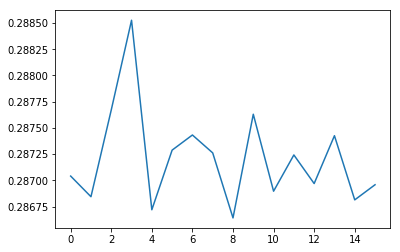

In [208]:
print(len(x_score))
plt.plot(x_score)